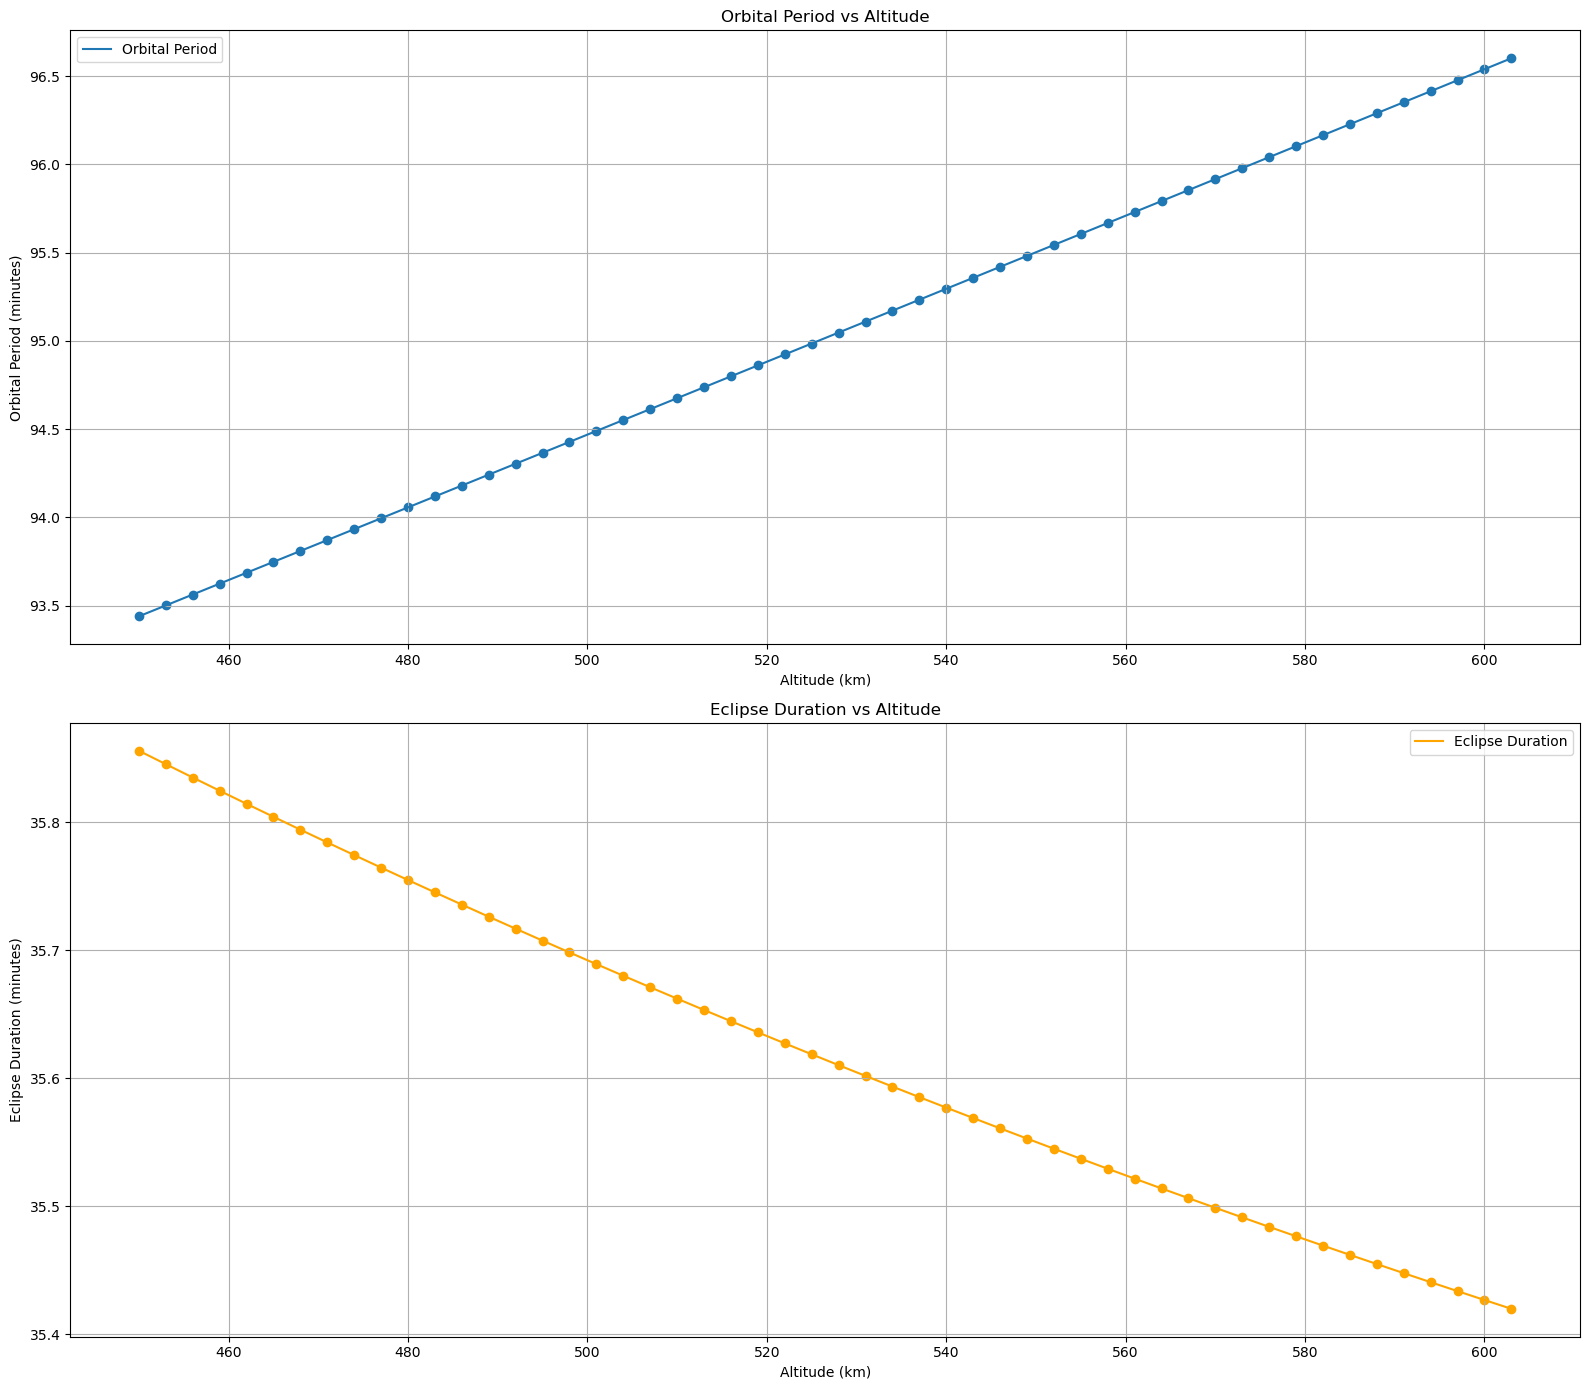

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu = 3.986e14  # Standard gravitational parameter for Earth in m^3/s^2
RE = 6371e3  # Radius of Earth in meters

# Altitudes from 450 km to 600 km with increments of 5 km
altitudes_km = np.arange(450, 605, 3)
altitudes_m = altitudes_km * 1e3

# Initialize lists to store results
orbital_periods = []
eclipse_durations = []

for altitude in altitudes_m:
    # Calculate semi-major axis
    a = RE + altitude
    
    # Calculate orbital period
    T = 2 * np.pi * np.sqrt(a**3 / mu)
    
    # Calculate umbral cone angle
    theta = np.arcsin(RE / a)
    
    # Calculate angle subtended by Earth's shadow
    alpha = 2 * theta
    
    # Calculate fraction of the orbital period in shadow
    f = alpha / (2 * np.pi)
    
    # Calculate eclipse duration
    T_eclipse = f * T
    
    # Append results
    orbital_periods.append(T)
    eclipse_durations.append(T_eclipse)

# Convert results to minutes for better readability
orbital_periods_minutes = np.array(orbital_periods) / 60
eclipse_durations_minutes = np.array(eclipse_durations) / 60

# Plot the data
plt.figure(figsize=(16, 14))

# Orbital Period
plt.subplot(2, 1, 1)
plt.plot(altitudes_km, orbital_periods_minutes, label='Orbital Period')
plt.scatter(altitudes_km, orbital_periods_minutes)
plt.xlabel('Altitude (km)')
plt.ylabel('Orbital Period (minutes)')
plt.title('Orbital Period vs Altitude')
plt.grid(True)
plt.legend()

# Eclipse Duration
plt.subplot(2, 1, 2)
plt.plot(altitudes_km, eclipse_durations_minutes, label='Eclipse Duration', color='orange')
plt.scatter(altitudes_km, eclipse_durations_minutes , color='orange')
plt.xlabel('Altitude (km)')
plt.ylabel('Eclipse Duration (minutes)')
plt.title('Eclipse Duration vs Altitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
